<a href="https://colab.research.google.com/github/Ju5t1n-Wang/SJSU_EE104/blob/main/Lab8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras.datasets import cifar10
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import SGD

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(32,
                                  32,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
weight_decay = 1e-4

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.compile('adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=21,
                    validation_data=(test_images, test_labels))

Epoch 1/21
1563/1563 [==============================] - 34s 15ms/step - loss: 1.5595 - accuracy: 0.4538 - val_loss: 1.2283 - val_accuracy: 0.5729
Epoch 2/21
1563/1563 [==============================] - 21s 13ms/step - loss: 1.1618 - accuracy: 0.6075 - val_loss: 1.0462 - val_accuracy: 0.6538
Epoch 3/21
1563/1563 [==============================] - 21s 13ms/step - loss: 1.0148 - accuracy: 0.6729 - val_loss: 0.9900 - val_accuracy: 0.6844
Epoch 4/21
1563/1563 [==============================] - 21s 14ms/step - loss: 0.9393 - accuracy: 0.7090 - val_loss: 0.8478 - val_accuracy: 0.7454
Epoch 5/21
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8915 - accuracy: 0.7299 - val_loss: 0.8666 - val_accuracy: 0.7371
Epoch 6/21
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8608 - accuracy: 0.7487 - val_loss: 0.8033 - val_accuracy: 0.7680
Epoch 7/21
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8417 - accuracy: 0.7604 - val_loss: 0.7891 -

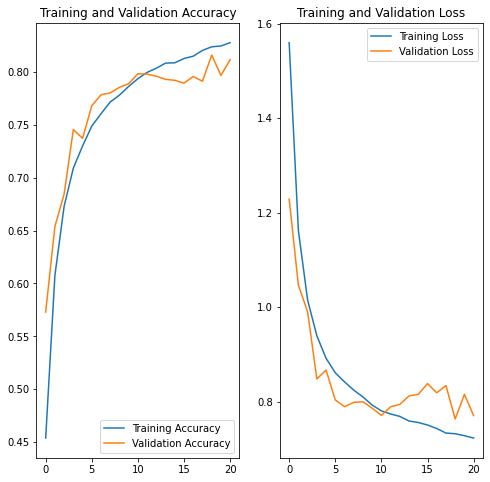

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(21)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 2s - loss: 0.7702 - accuracy: 0.8115 - 2s/epoch - 6ms/step
